In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.getcwd()
#this is the dataset location which is shown in video
'''
os.chdir('/content/drive/My Drive/day6')
'''
#now you have to use below one as you already created Data folder shortcut in My Drive
os.chdir('/content/drive/My Drive/day6')

In [4]:
apple_training_complete = pd.read_csv('apple_training.csv')  

In [5]:
apple_training_complete.shape

(1260, 7)

In [6]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values  


In [7]:
apple_training_processed.shape

(1260, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)  

In [9]:
apple_training_scaled.shape

(1260, 1)

In [10]:
apple_training_processed #data before scaling

array([[ 72.932854],
       [ 79.117142],
       [ 78.26857 ],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [11]:
apple_training_scaled


array([[0.14628787],
       [0.19795893],
       [0.19086893],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

In [12]:
features_set = []  
labels = []  
for i in range(60, 1260):  
    features_set.append(apple_training_scaled[i-60:i,0])
    labels.append(apple_training_scaled[i, 0])

In [13]:
len(features_set)

1200

In [14]:
features_set, labels = np.array(features_set), np.array(labels)  


In [15]:
features_set.shape

(1200, 60)

In [16]:
labels.shape

(1200,)

In [17]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  


In [18]:
features_set.shape

(1200, 60, 1)

In [19]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout

In [20]:
model = Sequential()

In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


In [21]:
model.add(Dropout(0.2))  


In [22]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [23]:
model.add(Dense(units = 1))  


In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [25]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)  


Epoch 1/100
38/38 [==============================] - 10s 91ms/step - loss: 0.0329
Epoch 2/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0068
Epoch 4/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0064
Epoch 6/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0059
Epoch 7/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0066
Epoch 8/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0068
Epoch 9/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0057
Epoch 10/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0052
Epoch 12/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0055
Epoch 13/100
38/38 [====

# Testing the LSTM

In [26]:
apple_testing_complete = pd.read_csv('apple_testing.csv')  
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values  

In [27]:
apple_testing_processed.shape

(20, 1)

Converting test data into right format
For each day of January 2018, we want our feature set to contain the opening stock prices for the previous 60 days. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing

In [28]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)


In [29]:
apple_total.shape

(1280,)

Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set.

In [30]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values 

In [31]:
test_inputs.shape

(80,)

Scale our test data as we did in train data

In [32]:
test_inputs = test_inputs.reshape(-1,1) 

In [33]:
test_inputs.shape

(80, 1)

In [34]:
 
test_inputs = scaler.transform(test_inputs)  

In [35]:
test_inputs[0]

array([0.82512526])

In [36]:
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])


In [37]:
test_features = np.array(test_features) 

In [38]:
test_features.shape

(20, 60)

In [39]:
 
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [40]:
test_features.shape

(20, 60, 1)

In [41]:
predictions = model.predict(test_features)  

In [42]:
predictions

array([[0.788203  ],
       [0.78560233],
       [0.78316057],
       [0.781168  ],
       [0.78003865],
       [0.7800405 ],
       [0.7810711 ],
       [0.782427  ],
       [0.78429365],
       [0.7869308 ],
       [0.79064476],
       [0.79451466],
       [0.79928493],
       [0.8042861 ],
       [0.80874026],
       [0.8124169 ],
       [0.81520164],
       [0.816304  ],
       [0.8152466 ],
       [0.81193817]], dtype=float32)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.

In [43]:
predictions = scaler.inverse_transform(predictions)

In [44]:
predictions

array([[149.76093],
       [149.44966],
       [149.15741],
       [148.91893],
       [148.78377],
       [148.78398],
       [148.90735],
       [149.06963],
       [149.29303],
       [149.60866],
       [150.05316],
       [150.51634],
       [151.08727],
       [151.68584],
       [152.21893],
       [152.65898],
       [152.99228],
       [153.12422],
       [152.99765],
       [152.60168]], dtype=float32)

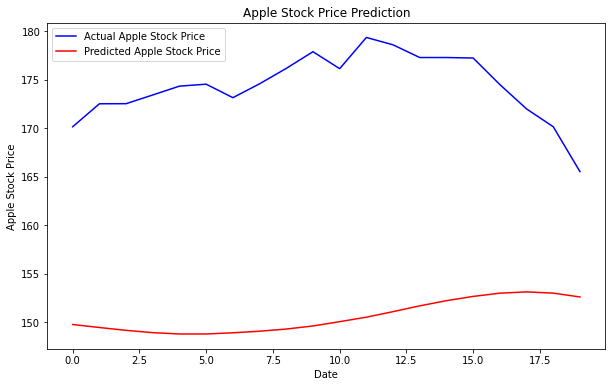

In [45]:
plt.figure(figsize=(10,6))  
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()  

Conclusion
A long short-term memory network (LSTM) is one of the most commonly used neural networks for time series analysis. The ability of LSTM to remember previous information makes it ideal for such tasks. In this article, we saw how we can use LSTM for the Apple stock price prediction.